In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data_ff.csv')

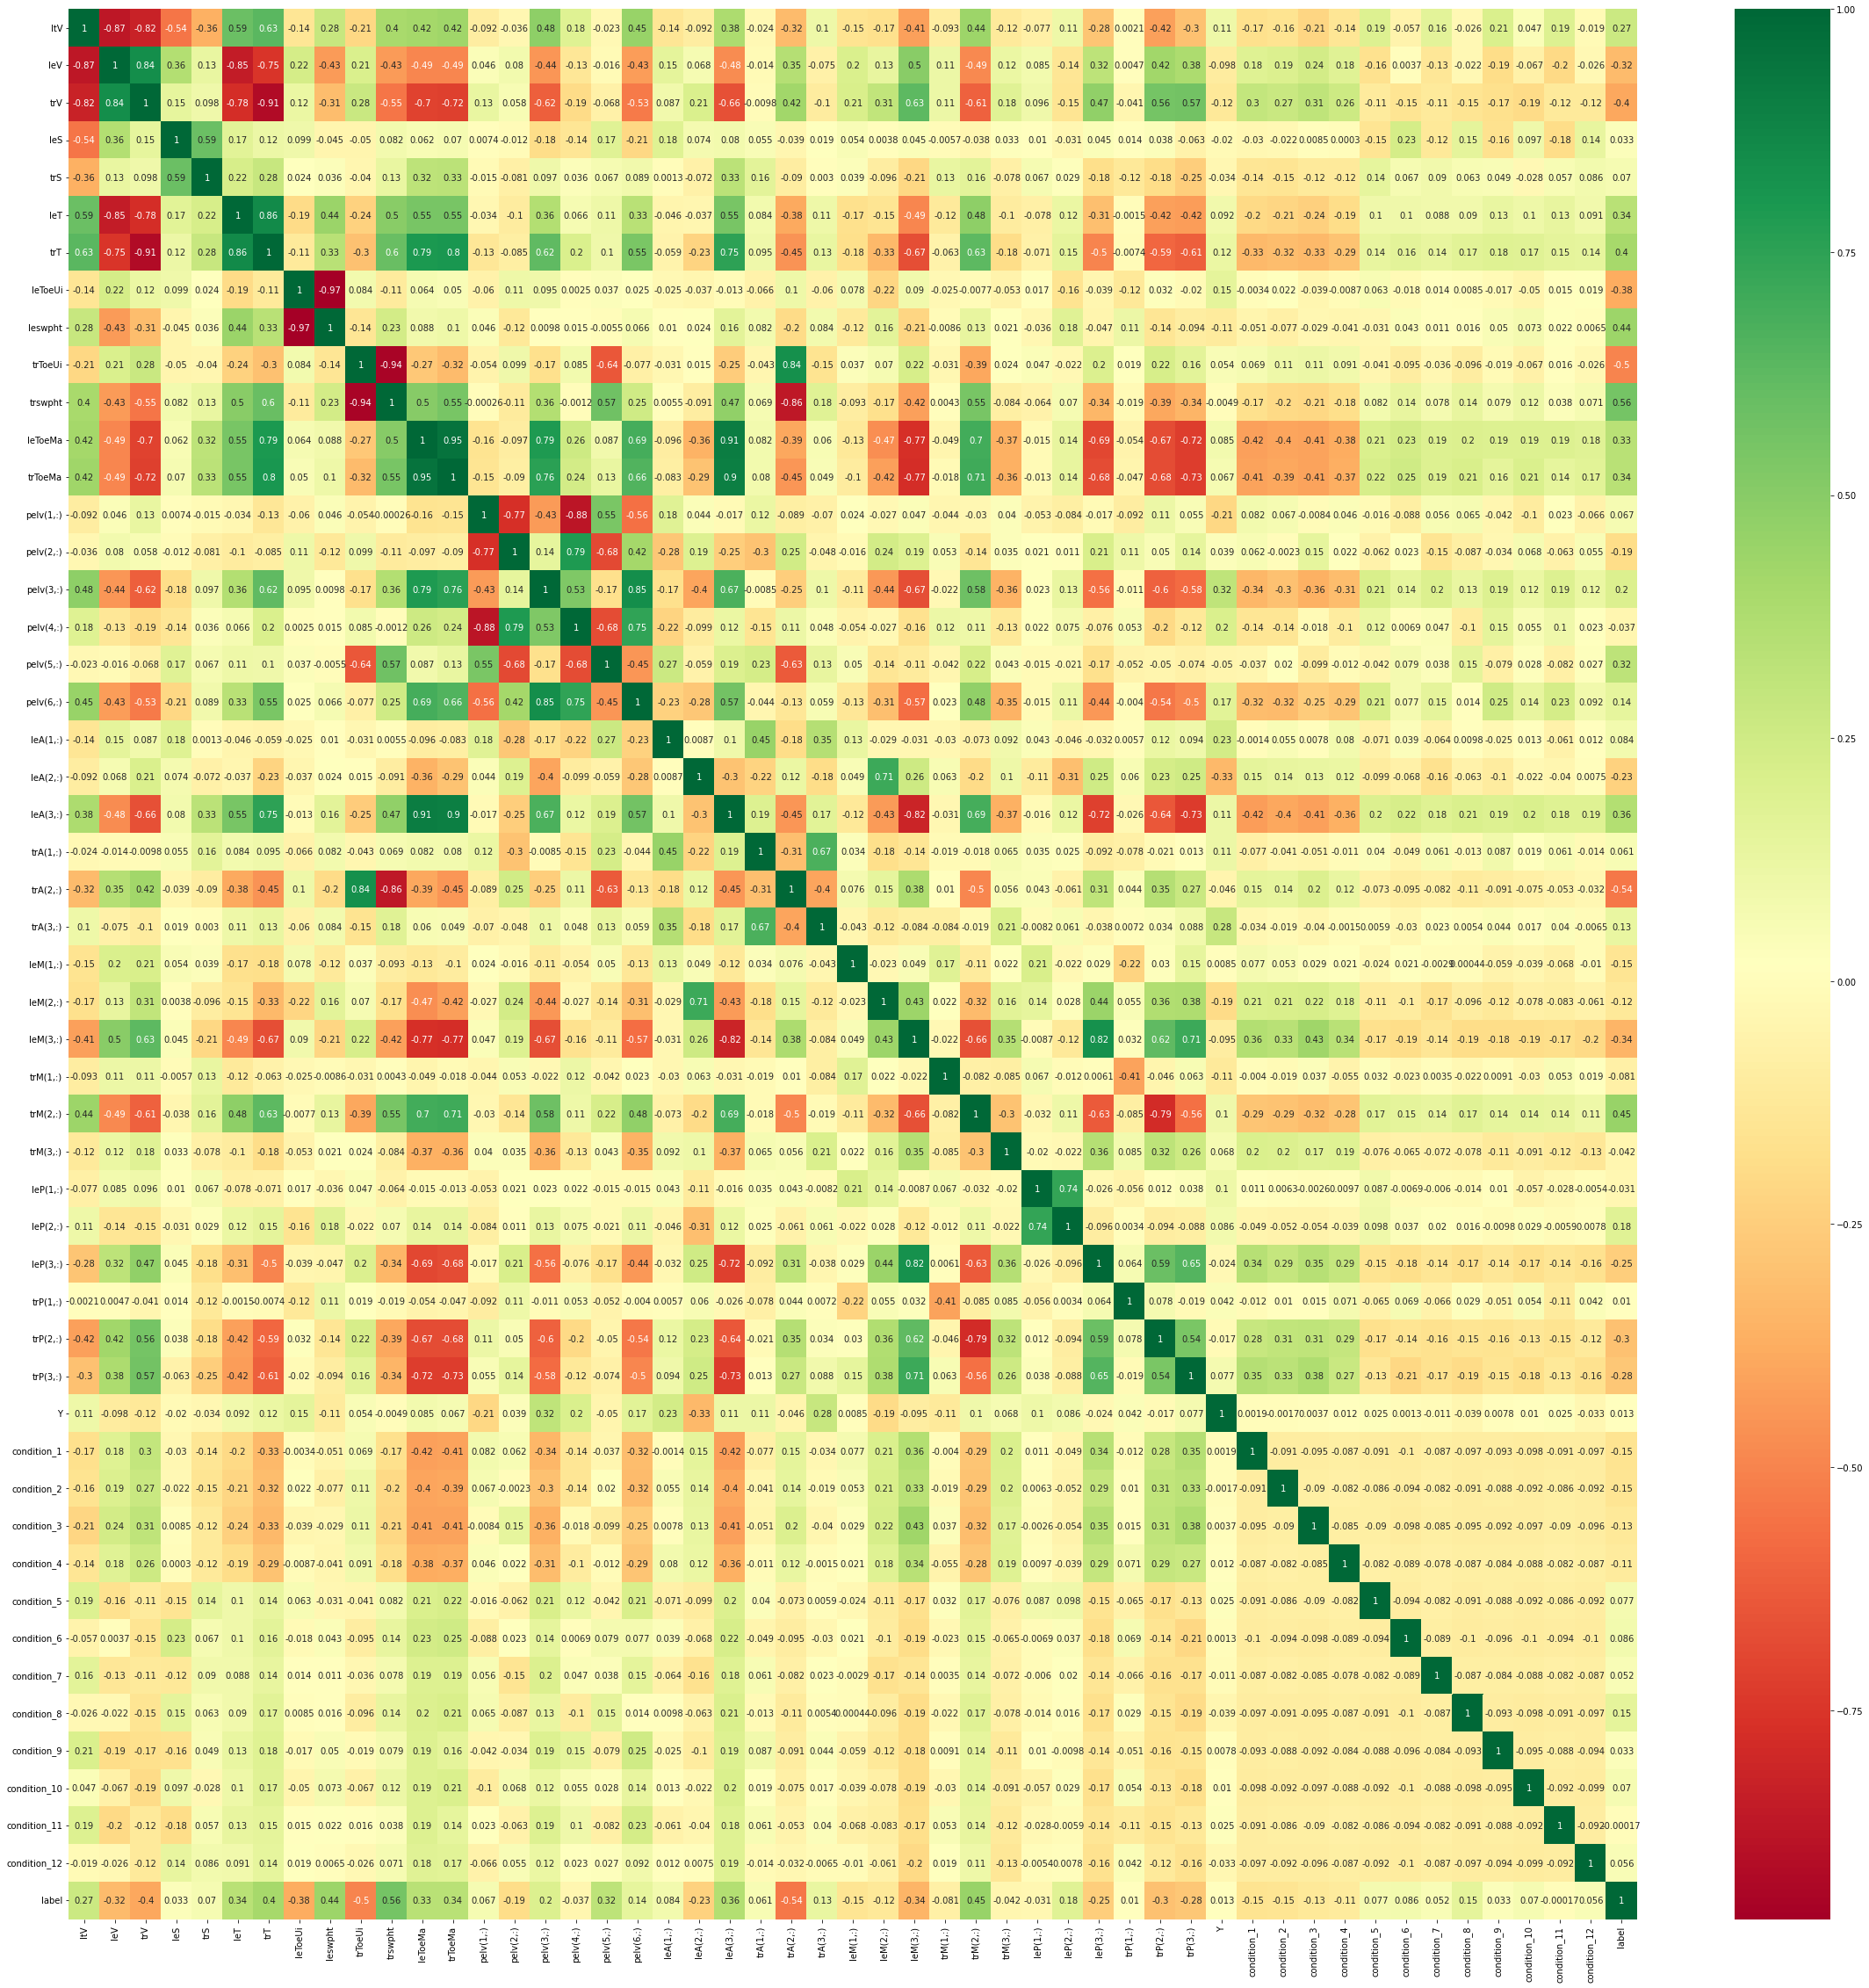

In [3]:
import seaborn as sns
X = data.iloc[:,0:50]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.savefig('correlation.png')

在变量和分类标签的函数有：


f_classif: ANOVA F-value between label/feature for classification tasks.

mutual_info_classif: Mutual information for a discrete target.

chi2: Chi-squared stats of non-negative features for classification tasks.

f_regression: F-value between label/feature for regression tasks.

mutual_info_regression: Mutual information for a continuous target.

SelectPercentile: Select features based on percentile of the highest scores.

SelectFpr: Select features based on a false positive rate test.

SelectFdr: Select features based on an estimated false discovery rate.

SelectFwe: Select features based on family-wise error rate.

GenericUnivariateSelect: Univariate feature selector with configurable mode.

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif

X = data.iloc[:,0:50]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=50)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(50,'Score'))  #print 10 best features

           Specs         Score
10       trswpht  10017.086899
9        trToeUi   8704.375930
8        leswpht   1419.227260
7        leToeUi   1360.037906
23      trA(2,:)   1172.382321
17     pelv(5,:)    257.308764
29      trM(2,:)    196.955667
6            trT    163.255783
2            trV    147.791927
12       trToeMa    128.823353
5            leT    115.403488
1            leV    109.148599
11       leToeMa    103.312528
21      leA(3,:)    101.351073
20      leA(2,:)     93.769368
27      leM(3,:)     89.586917
0            ltV     74.688792
35      trP(2,:)     70.440994
33      leP(3,:)     51.665655
36      trP(3,:)     50.836055
15     pelv(3,:)     42.288976
32      leP(2,:)     33.803304
14     pelv(2,:)     27.426761
26      leM(2,:)     19.511016
18     pelv(6,:)     17.308790
39   condition_2     16.728167
40   condition_3     15.604310
45   condition_8     12.957761
24      trA(3,:)     12.898263
38   condition_1     11.996876
41   condition_4     11.359502
25      

[0.0040481  0.00574743 0.00597001 0.00290877 0.00149743 0.01058084
 0.01297925 0.14515075 0.12714508 0.18151948 0.18134794 0.0134971
 0.01976288 0.00570727 0.0054839  0.00729195 0.00367812 0.03143371
 0.00458799 0.00609131 0.03870217 0.01044665 0.00532343 0.05621795
 0.00425015 0.00202123 0.00834112 0.00869502 0.00229963 0.01530767
 0.00191206 0.00246111 0.02214986 0.00569913 0.00165844 0.01586636
 0.00304127 0.00821514 0.00051912 0.00106464 0.00107638 0.00025064
 0.00091618 0.00112743 0.00107754 0.00161438 0.00078965 0.00070942
 0.00116888 0.00064801]


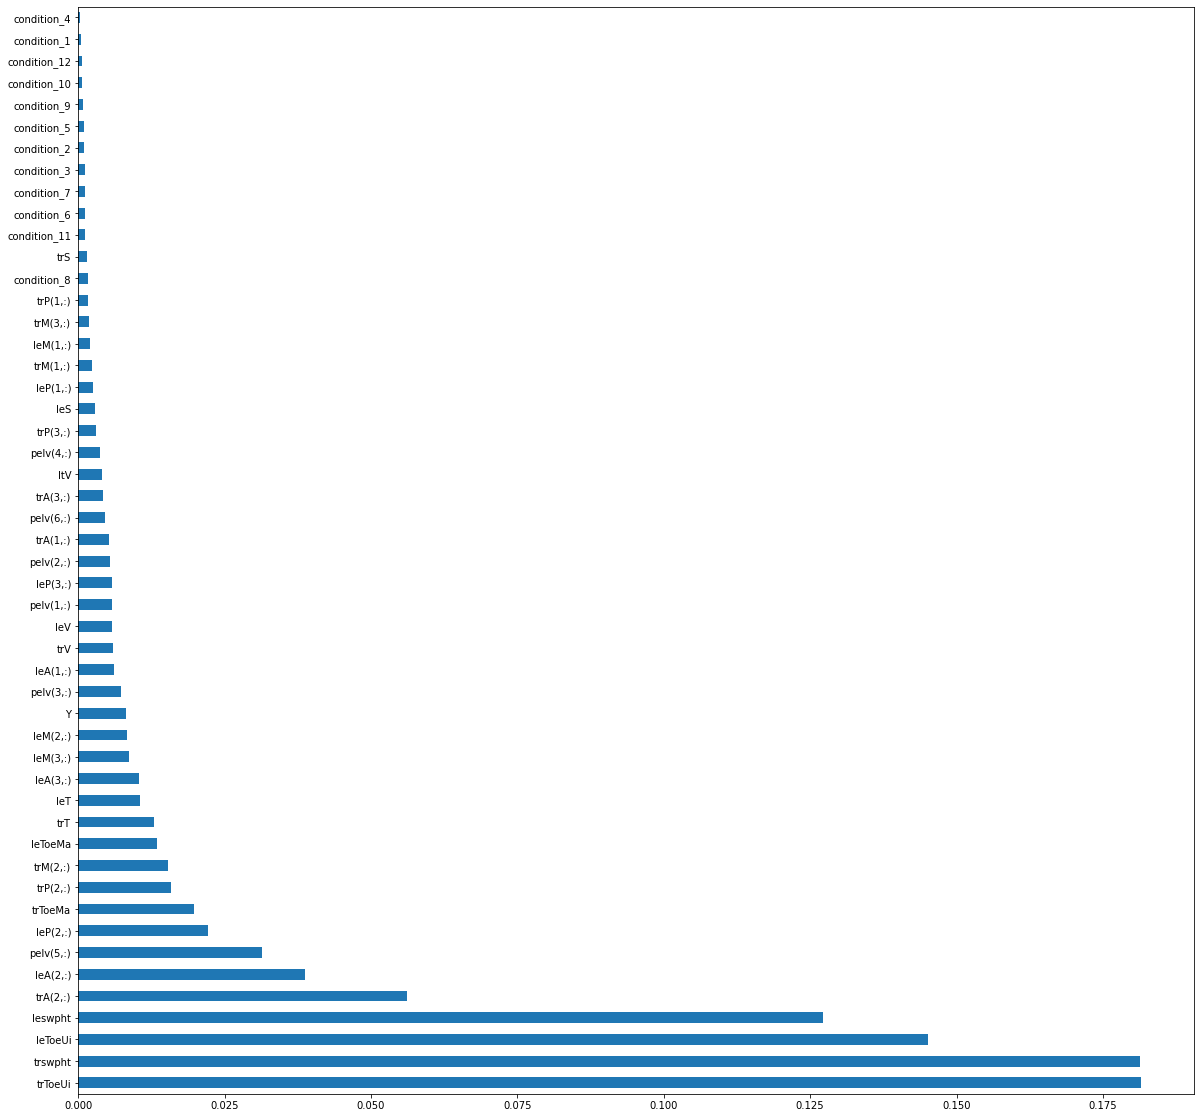

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize=(20,20))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

[3.44864234e-03 6.38064395e-03 8.44397901e-03 1.69195597e-03
 1.16173574e-03 5.99781101e-03 1.06702628e-02 1.24082934e-01
 1.27965929e-01 1.51321407e-01 1.60900432e-01 9.45540774e-03
 1.05838053e-02 3.41023437e-03 3.22399790e-03 3.91823353e-03
 2.67480372e-03 3.21779659e-02 3.89463941e-03 5.98994984e-03
 3.69120673e-02 6.46766675e-03 4.75876030e-03 1.28419584e-01
 4.01501239e-03 1.46927063e-03 1.25873298e-02 6.56400092e-03
 2.26582163e-03 2.16932951e-02 1.43393956e-03 1.99203393e-03
 5.75095263e-02 3.62866663e-03 1.46864156e-03 2.60261802e-02
 2.28838289e-03 1.85791012e-03 7.97859693e-05 4.10990984e-05
 1.40989805e-04 2.96953350e-05 1.40088185e-04 1.11778837e-04
 2.19988732e-04 1.90816688e-04 5.16105725e-05 1.21913539e-04
 6.28043148e-05 5.65671186e-05]


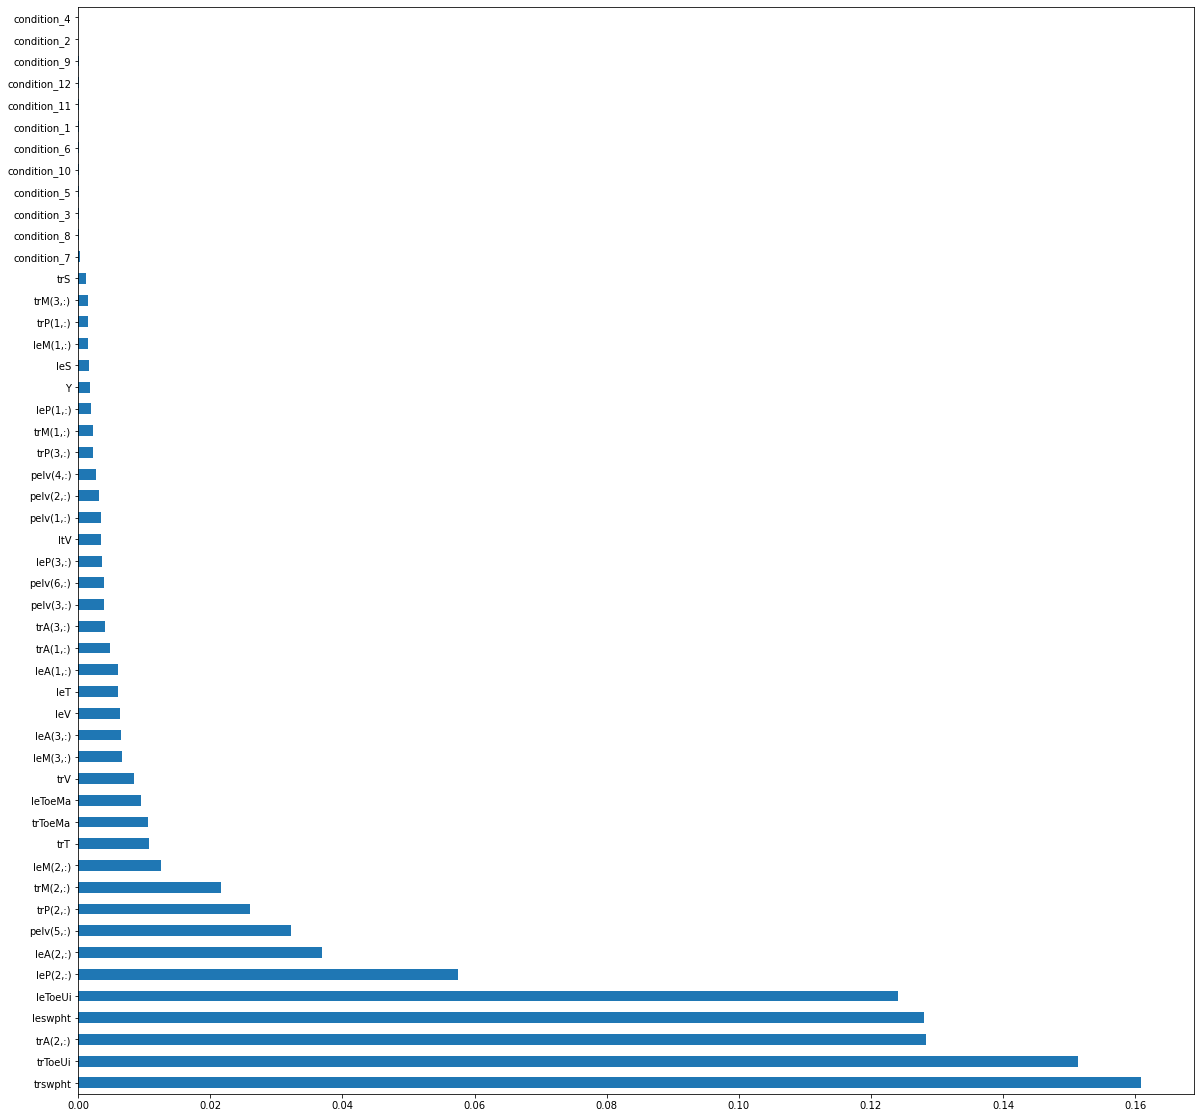

In [6]:

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=750, n_jobs=-1, random_state=42)
forest.fit(X, y)
print(forest.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize=(20,20))
feat_importances = pd.Series(forest.feature_importances_, index=X.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

Permutation Feature Importance

In [14]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
rf = RandomForestClassifier(n_estimators=750, n_jobs=-1, random_state=42)
rf.fit(X, y)


RandomForestClassifier(n_estimators=750, n_jobs=-1, random_state=42)

In [ ]:
result = permutation_importance(rf, X, y, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(rf.feature_importances_)
tree_indices = np.arange(0, len(rf.feature_importances_)) + 0.5


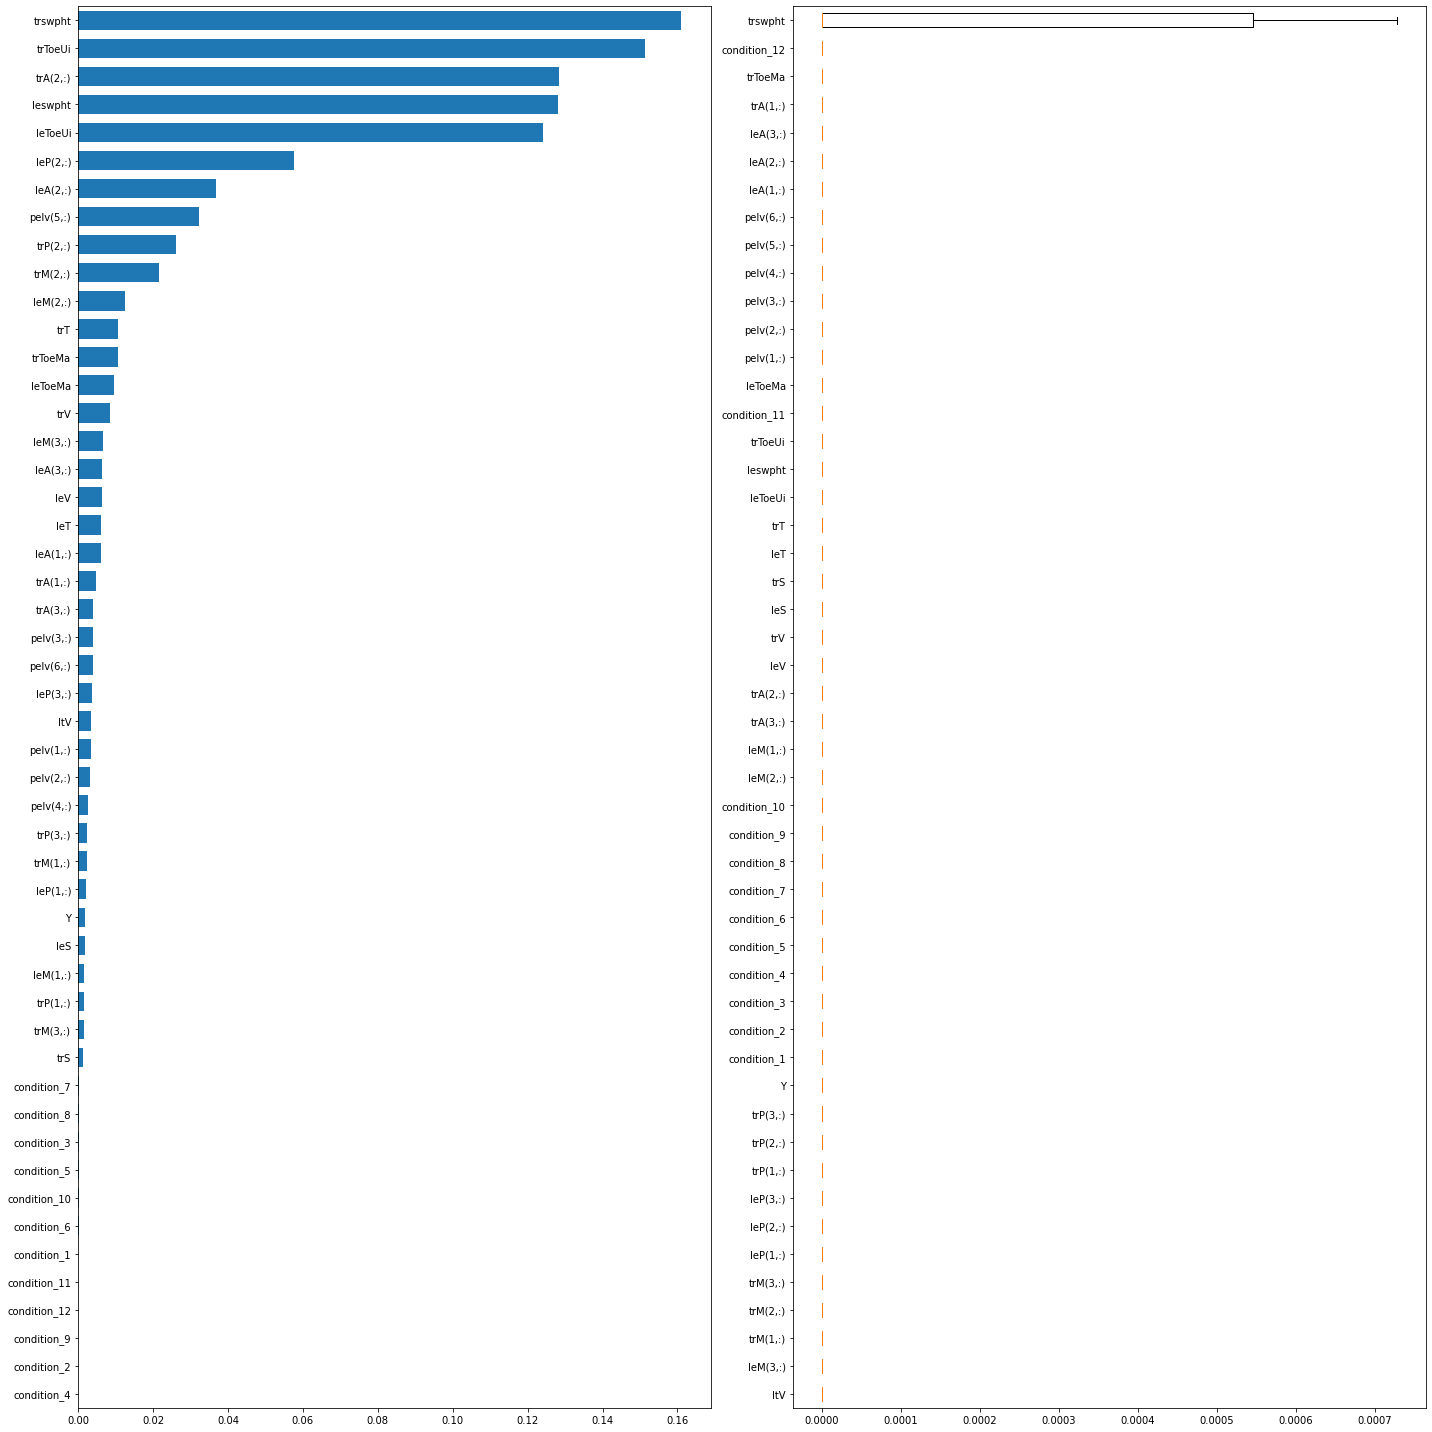

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))
ax1.barh(tree_indices, rf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(X.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(rf.feature_importances_)))
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=X.columns[perm_sorted_idx],
)
fig.tight_layout()
plt.show()

In [ ]:
result = permutation_importance(
    rf, X, y, n_repeats=10, random_state=42, n_jobs=-1
)
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
plt.figure(figsize=(20,20))
ax = importances.plot.box(vert=False, whis=10, figsize=(20,20))
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()